In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [27]:
df = pd.read_csv('day.csv')

In [28]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [29]:
df.shape

(730, 16)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [31]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [32]:
df.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

In [33]:
# dropping the unwanted columns
# instant has only index for the row, dteday has date which can be compensated by year and month column,
# casual and registered seems to be the breakup by category for cnt column.

df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [34]:
# Encoding/mapping the season column

df.season = df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [35]:
# Encoding/mapping the month column

df.month = df.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [36]:
# Encoding/mapping the weekday column

df.weekday = df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [37]:

# Encoding/mapping the weathersit column

df.weathersit = df.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [38]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


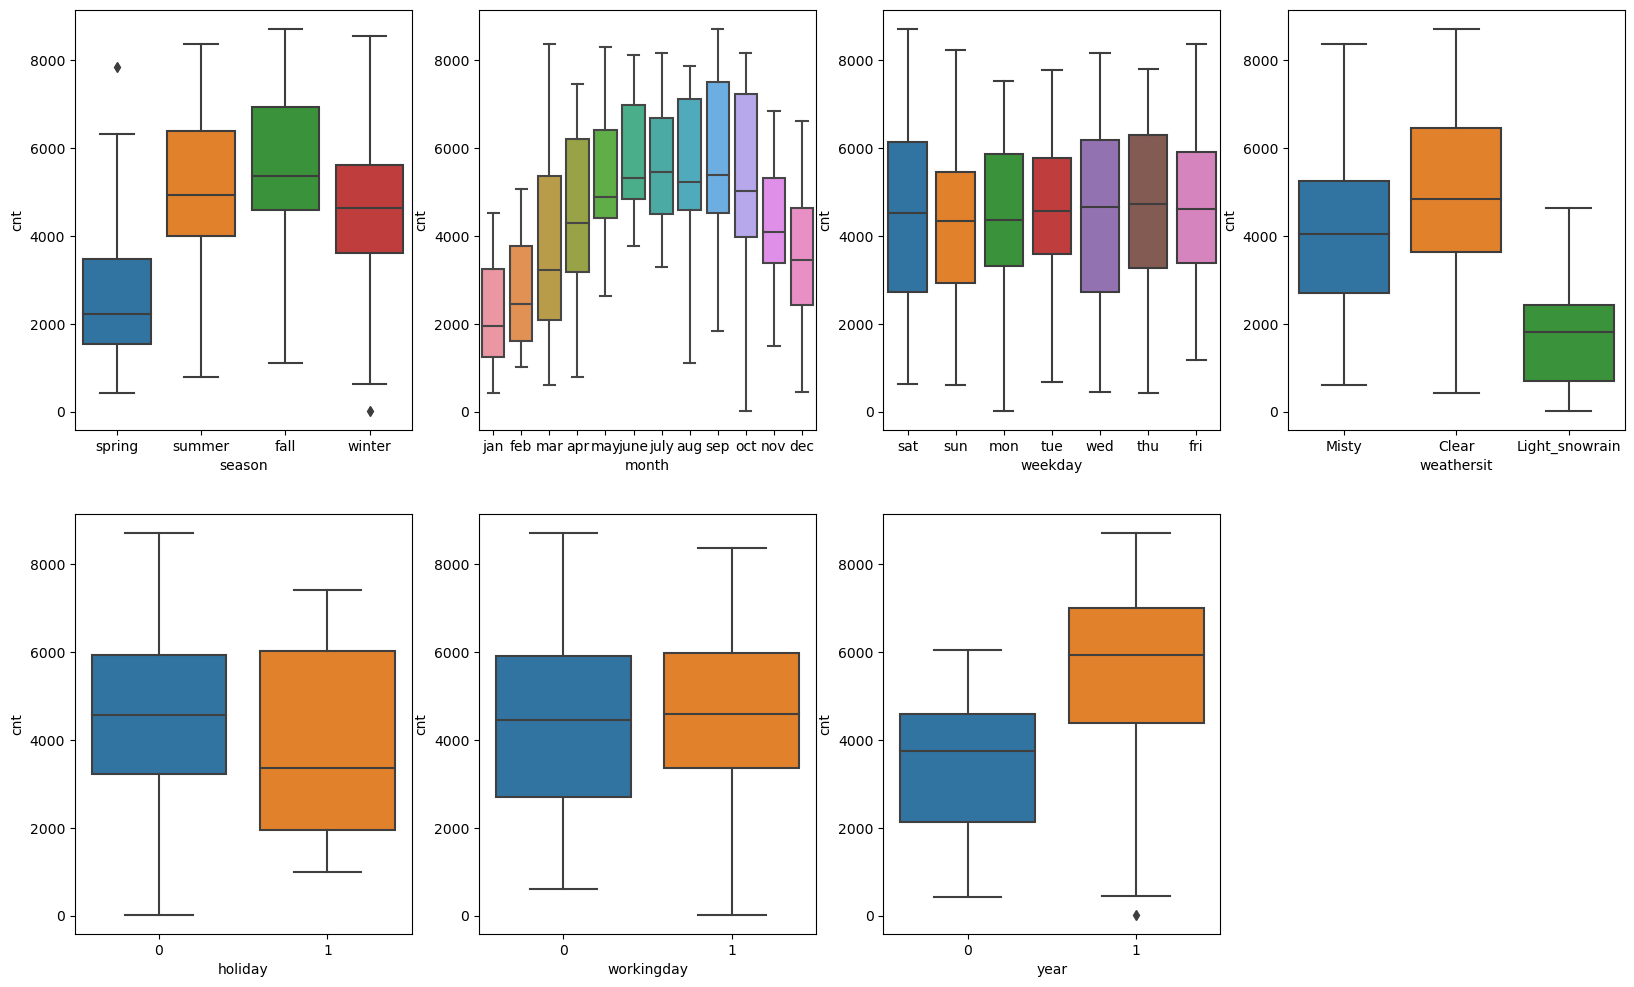

In [39]:
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,4,2)
sns.boxplot(x = 'month', y = 'cnt', data = df)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(2,4,7)
sns.boxplot(x = 'year', y = 'cnt', data = df)
plt.show()

In [49]:
#Function to plot categorical variables
def plot_cat_columns(column):
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.barplot(x=column,y='cnt',data=df)
    plt.subplot(1,2,2)
    sns.barplot(x=column,y='cnt',data=df, hue='year',palette='Set1')
    plt.legend(labels=['2018', '2019'])
    plt.show()

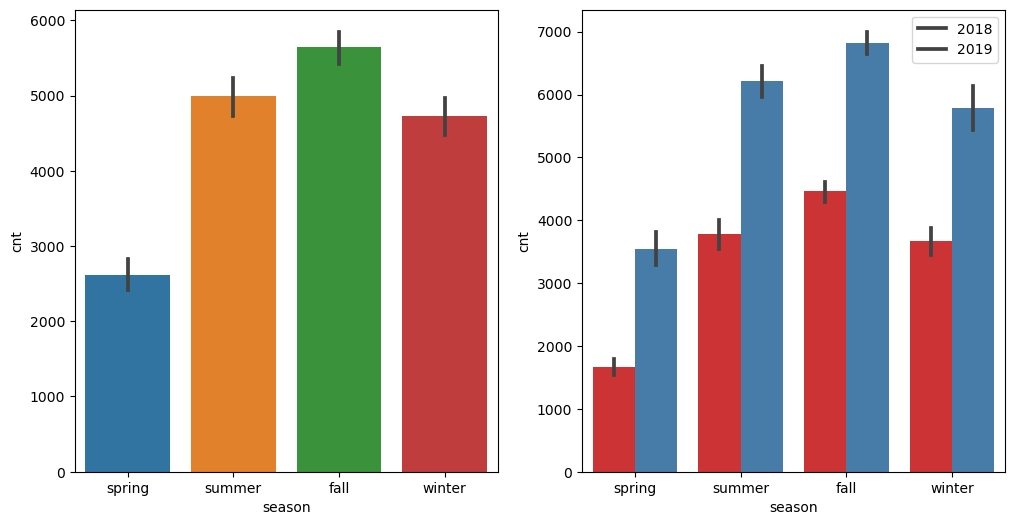

In [50]:
plot_cat_columns('season')

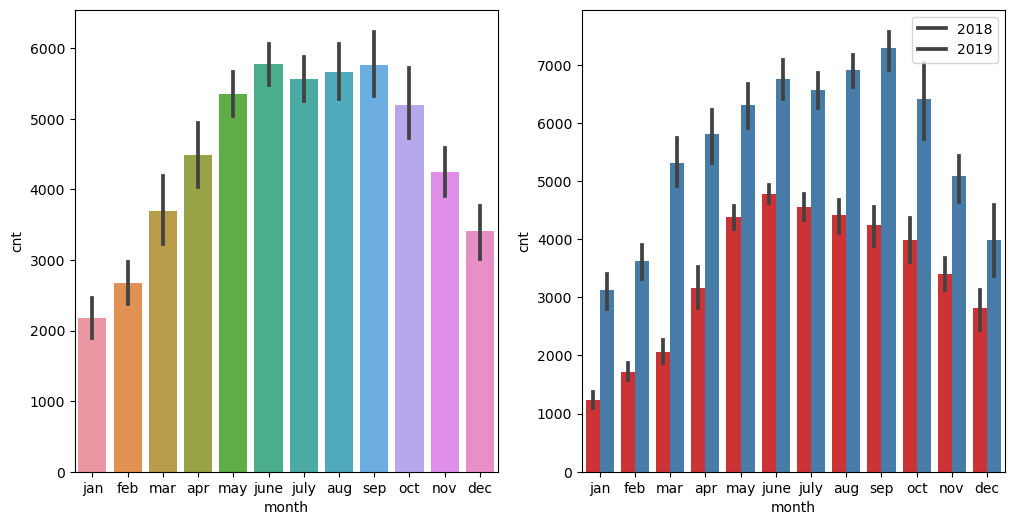

In [51]:
plot_cat_columns('month')

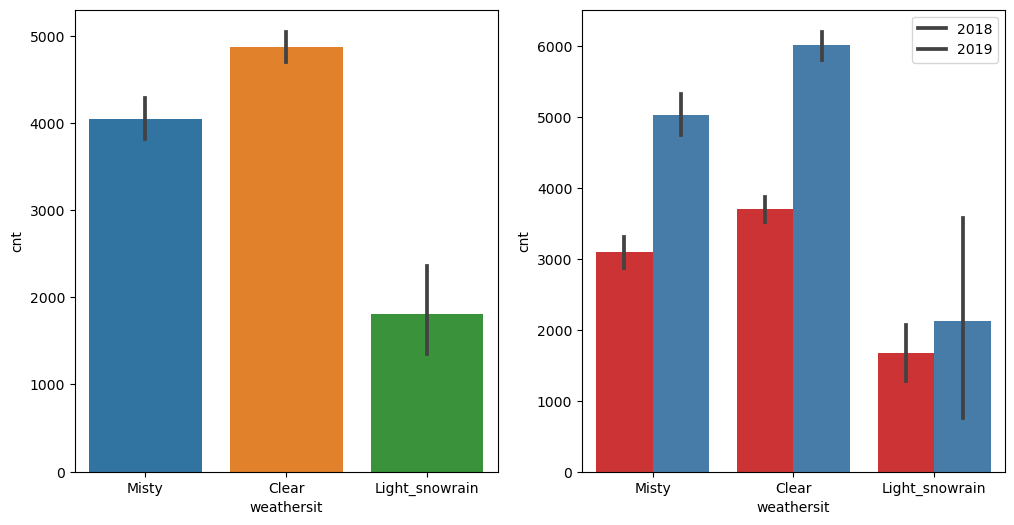

In [52]:
plot_cat_columns('weathersit')

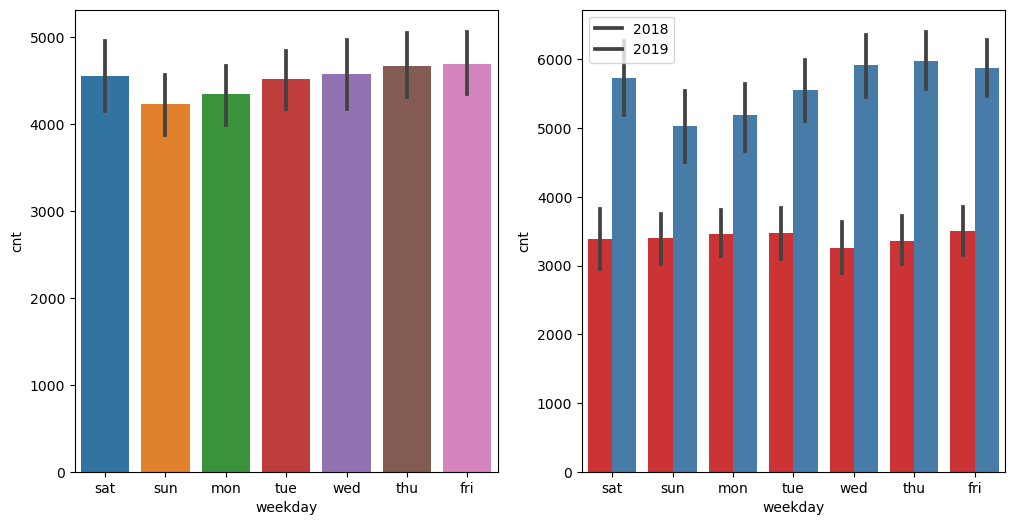

In [53]:
plot_cat_columns('weekday')

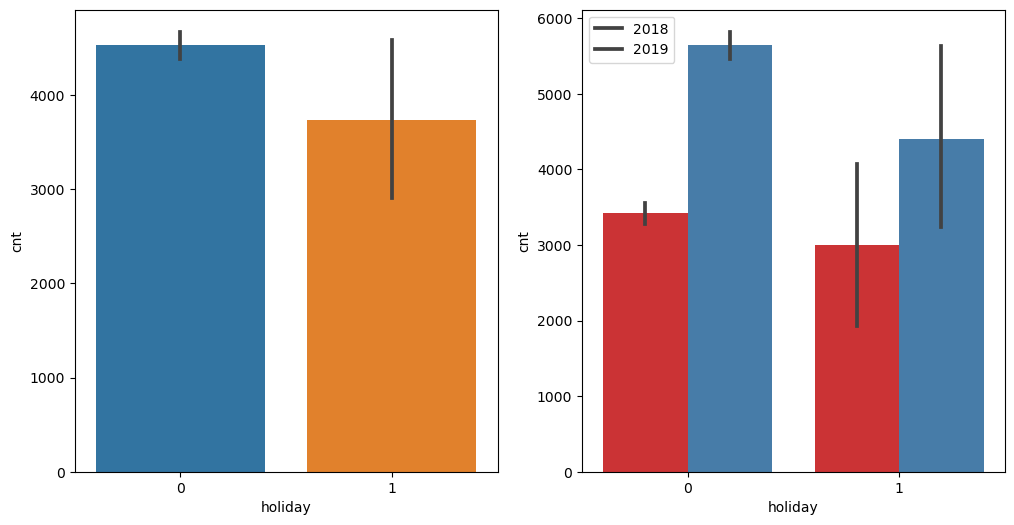

In [54]:
plot_cat_columns('holiday')

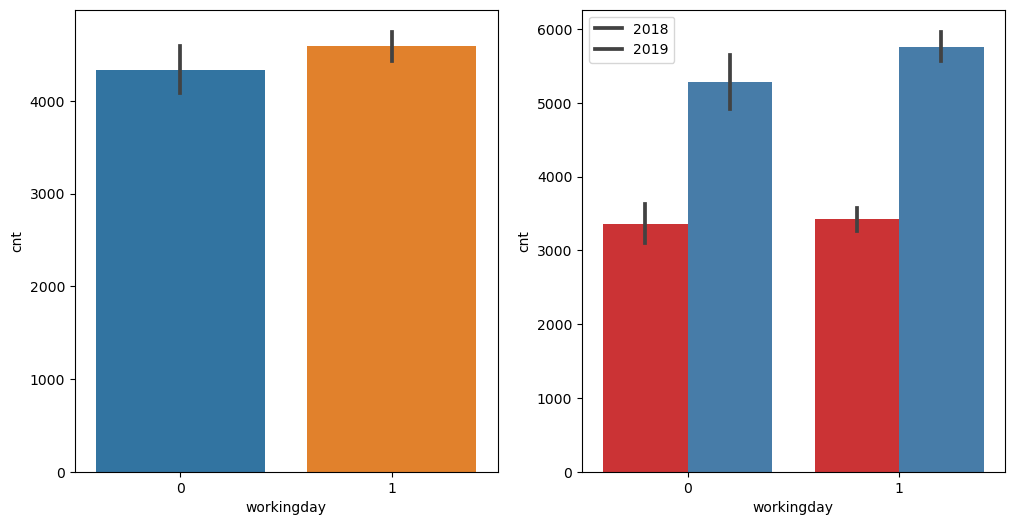

In [55]:
plot_cat_columns('workingday')

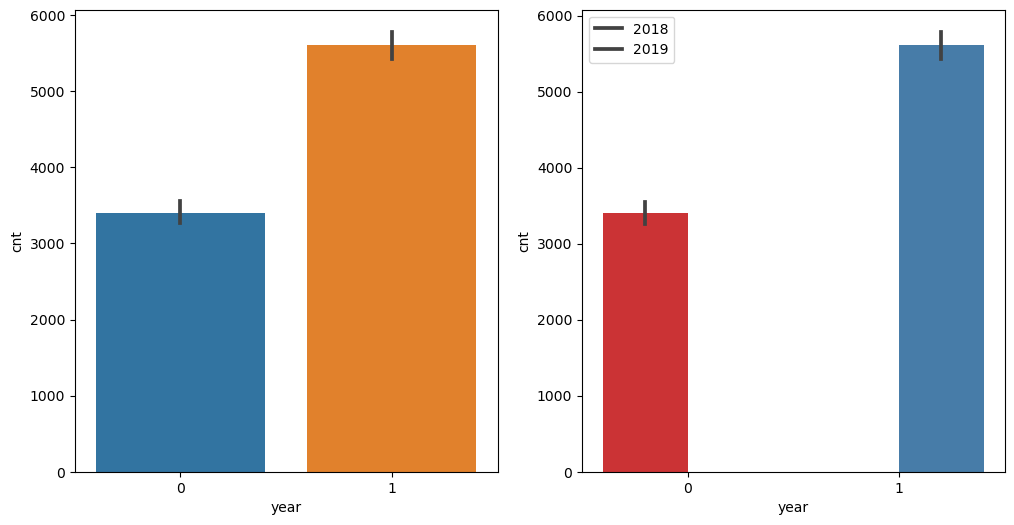

In [56]:
plot_cat_columns('year')

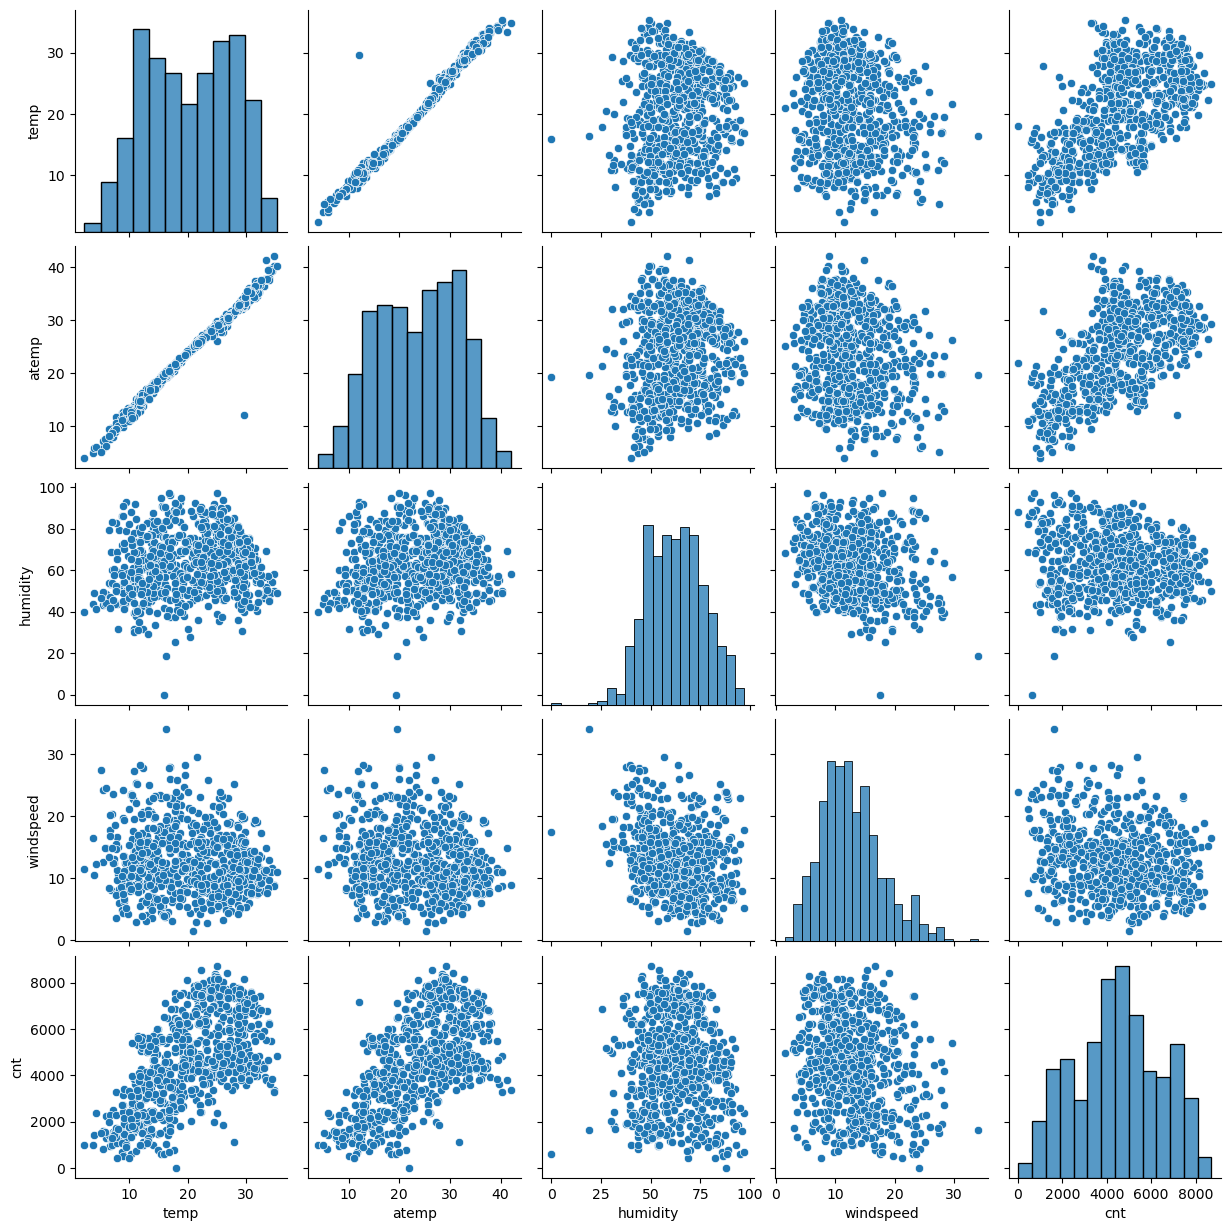

In [57]:
sns.pairplot(data=df,vars=['temp','atemp','humidity','windspeed','cnt'])
plt.show()

In [58]:
months_df=pd.get_dummies(df.month,drop_first=True)
weekdays_df=pd.get_dummies(df.weekday,drop_first=True)
weathersit_df=pd.get_dummies(df.weathersit,drop_first=True)
seasons_df=pd.get_dummies(df.season,drop_first=True)

In [59]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [60]:
# Merging  the dataframe, with the dummy variable dataset. 

df_new = pd.concat([df,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)

In [61]:
df_new.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,...,1,0,0,0,0,0,1,1,0,0
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,...,0,1,0,0,0,0,1,1,0,0
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,1,0,0,0,1,0,0
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,1,0,0,1,0,0


In [62]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   year            730 non-null    int64  
 2   month           730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   humidity        730 non-null    float64
 10  windspeed       730 non-null    float64
 11  cnt             730 non-null    int64  
 12  aug             730 non-null    uint8  
 13  dec             730 non-null    uint8  
 14  feb             730 non-null    uint8  
 15  jan             730 non-null    uint8  
 16  july            730 non-null    uint8  
 17  june            730 non-null    uin

In [63]:
# dropping unnecessary columns as we have already created dummy variable out of it.

df_new.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)

In [64]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   humidity        730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   aug             730 non-null    uint8  
 9   dec             730 non-null    uint8  
 10  feb             730 non-null    uint8  
 11  jan             730 non-null    uint8  
 12  july            730 non-null    uint8  
 13  june            730 non-null    uint8  
 14  mar             730 non-null    uint8  
 15  may             730 non-null    uint8  
 16  nov             730 non-null    uint8  
 17  oct             730 non-null    uin

In [65]:
# splitting the dataframe into Train and Test

np.random.seed(0)
df_train, df_test = train_test_split(df_new, train_size = 0.7, random_state = 100)

In [66]:
df_train.shape

(510, 30)

In [67]:
df_test.shape

(220, 30)

In [68]:
scaler = MinMaxScaler()

In [69]:
num_vars = ['temp','atemp','humidity','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [70]:
df_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.096078,0.084314,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.294988,0.278131,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


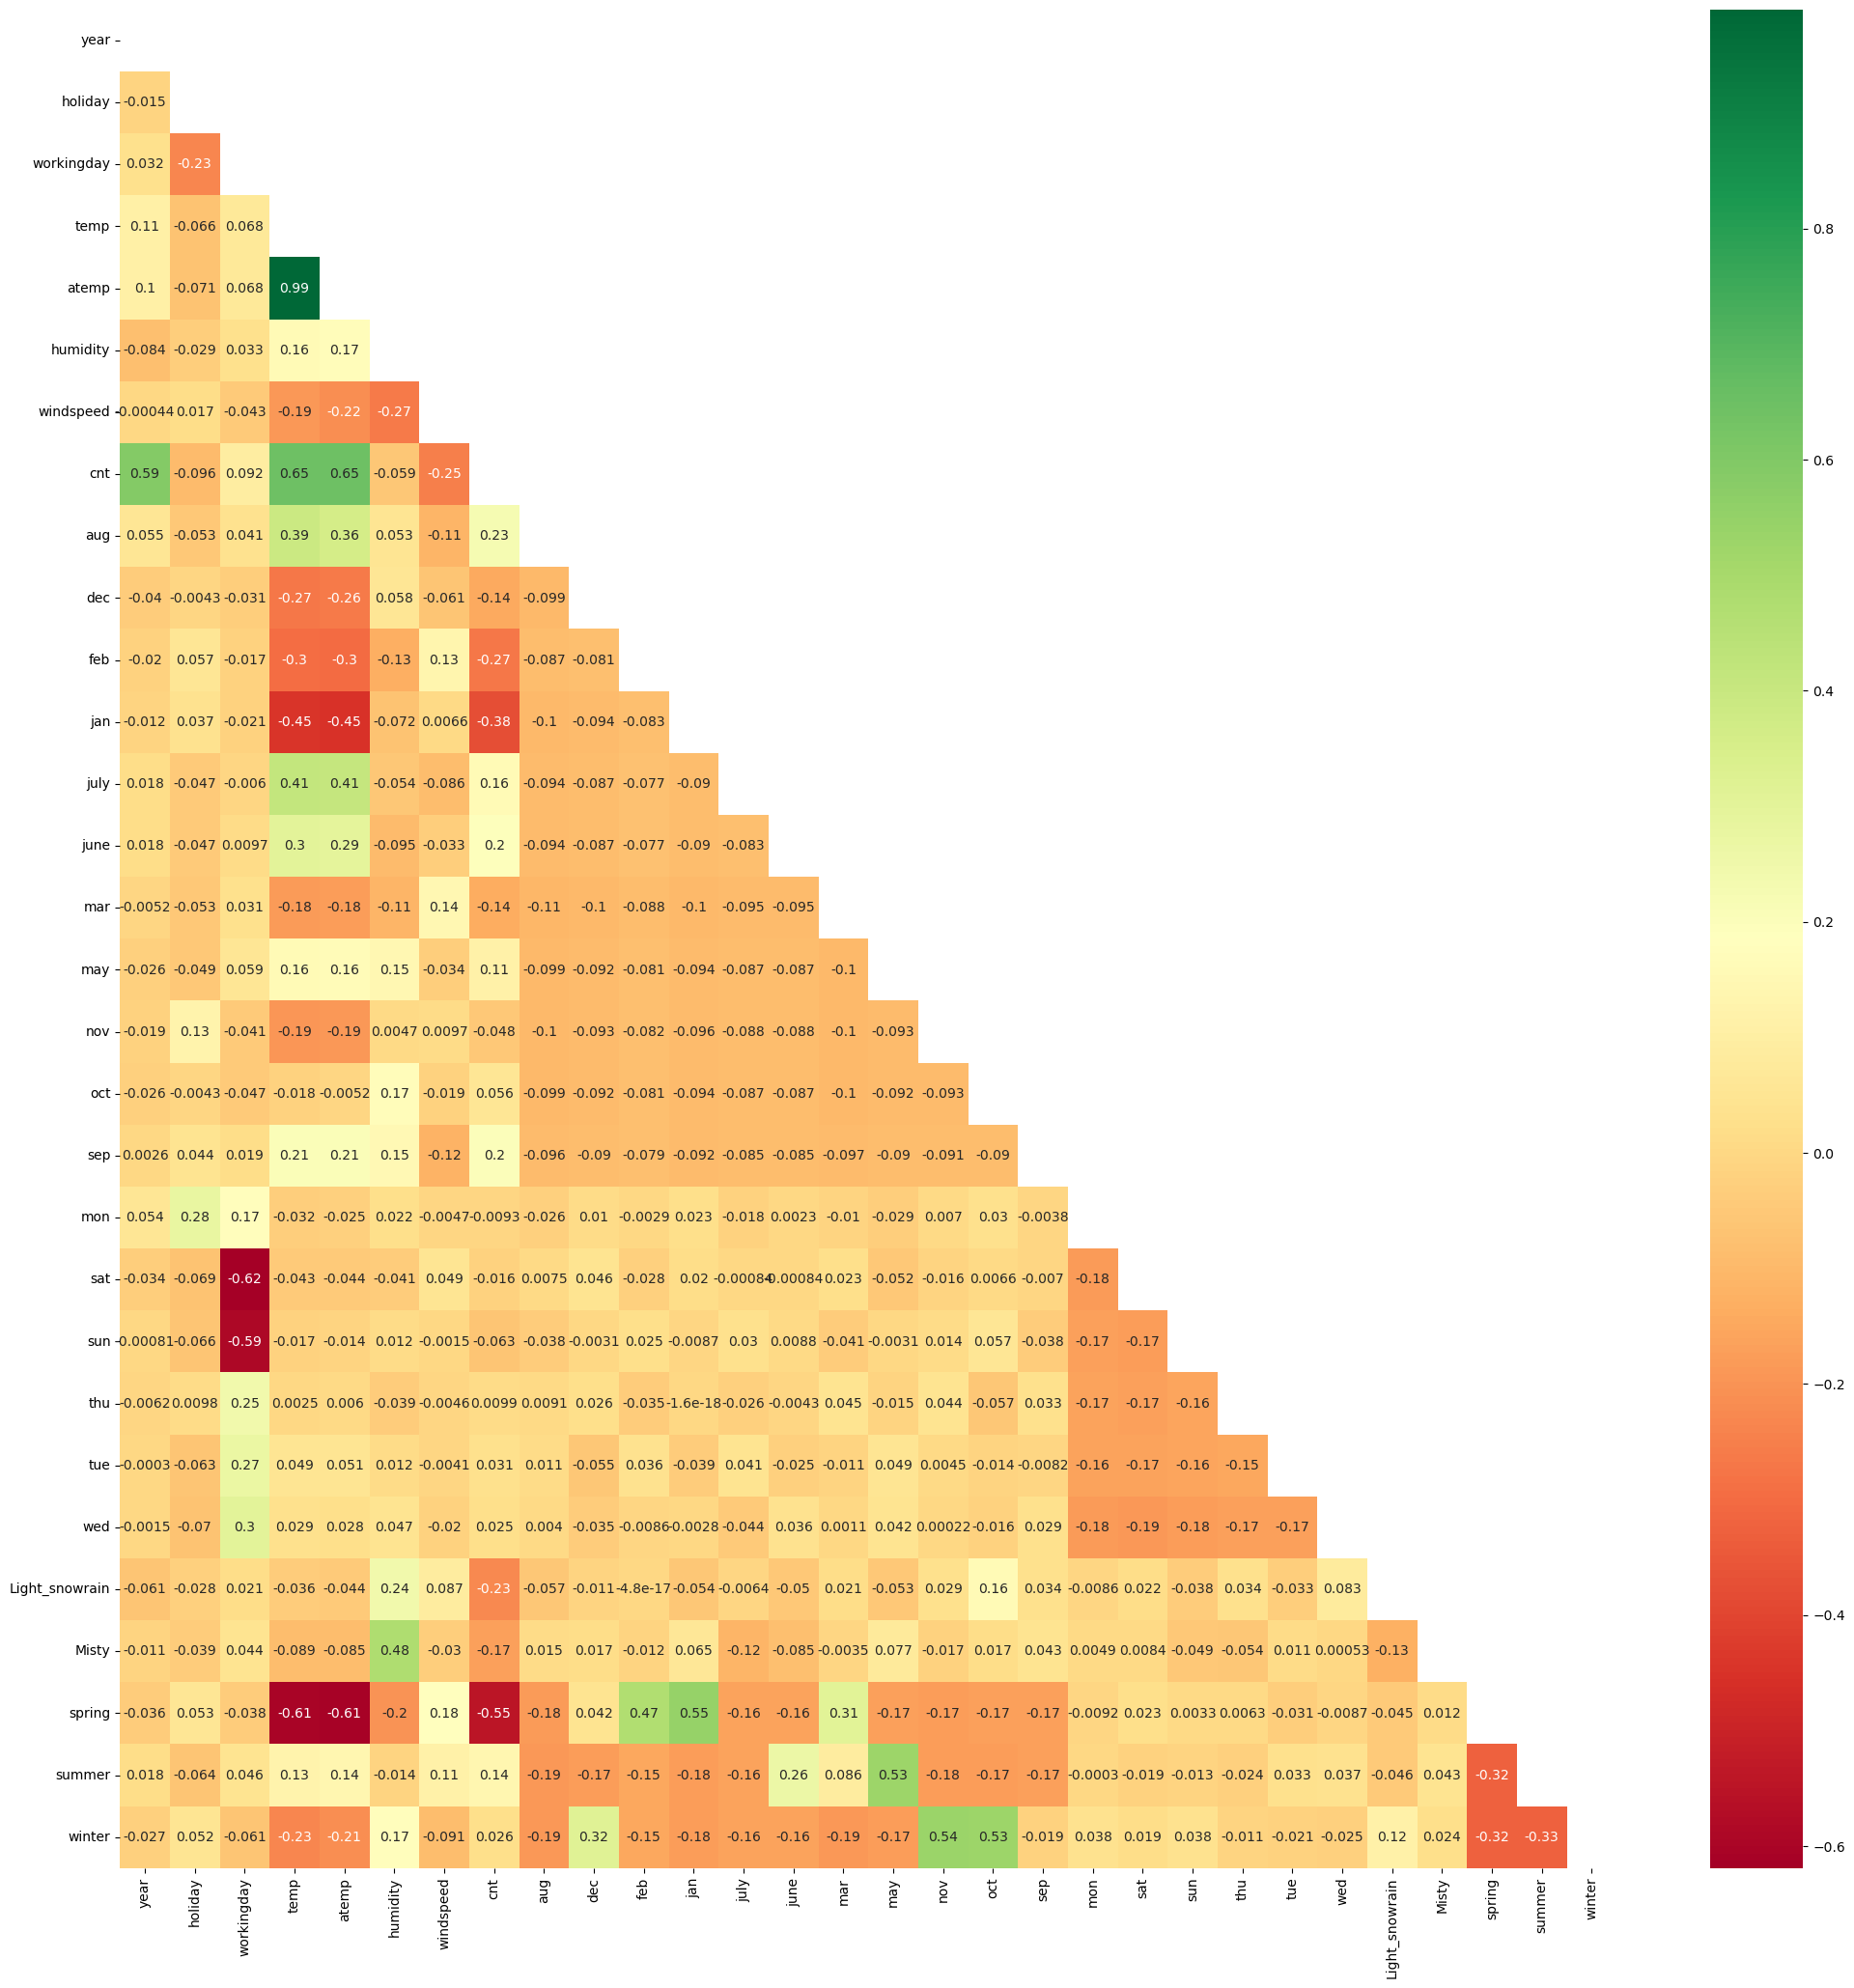

In [71]:
plt.figure(figsize = (25,25))
matrix = np.triu(df_train.corr())
sns.heatmap(df_train.corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.show()

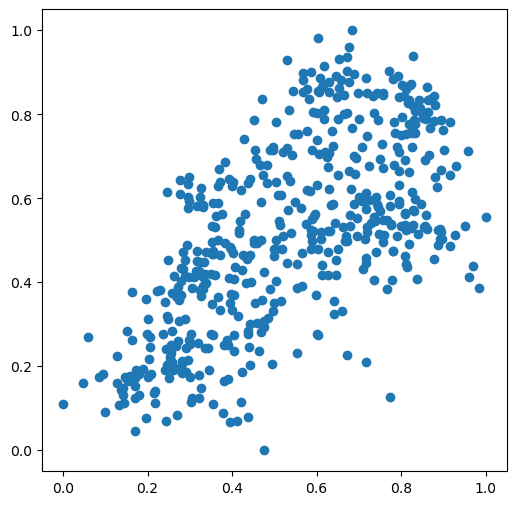

In [72]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

In [73]:
y_train = df_train.pop('cnt')
X_train = df_train

In [75]:
# Recursive feature elimination 

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [76]:
#List of variables selected in top 15 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 8),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('aug', True, 1),
 ('dec', False, 3),
 ('feb', False, 2),
 ('jan', True, 1),
 ('july', False, 6),
 ('june', False, 15),
 ('mar', False, 7),
 ('may', False, 5),
 ('nov', False, 4),
 ('oct', False, 10),
 ('sep', True, 1),
 ('mon', False, 14),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 12),
 ('tue', False, 9),
 ('wed', False, 11),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('spring', False, 13),
 ('summer', True, 1),
 ('winter', True, 1)]

In [77]:
col = X_train.columns[rfe.support_]

In [78]:
X_train_rfe = X_train[col]

In [80]:
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [81]:
X_train_rfe = X_train[col]
# calculate VIF

calculateVIF(X_train_rfe)

,Features,VIF
2,workingday,34.00
9,sat,8.38
10,sun,8.20
1,holiday,2.24
3,temp,1.94
4,humidity,1.88
14,winter,1.58
12,Misty,1.56
7,jan,1.55
13,summer,1.48


In [82]:
# Building 1st linear regression model

X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.4
Date:                Tue, 21 Nov 2023   Prob (F-statistic):          1.01e-191
Time:                        16:48:56   Log-Likelihood:                 518.38
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     495   BIC:                            -943.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1727      0.023      7.

In [83]:
# As humidity shows high VIF values hence we can drop it
X_train_new = X_train_rfe.drop(['humidity'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,workingday,15.91
8,sat,4.41
9,sun,4.10
3,temp,1.85
1,holiday,1.54
6,jan,1.54
13,winter,1.51
12,summer,1.47
5,aug,1.45
7,sep,1.21


In [84]:
X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     202.8
Date:                Tue, 21 Nov 2023   Prob (F-statistic):          6.55e-189
Time:                        16:49:35   Log-Likelihood:                 508.90
No. Observations:                 510   AIC:                            -989.8
Df Residuals:                     496   BIC:                            -930.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1017      0.016      6.

In [86]:
# We can drop sun variable as it has high p-value
X_train_new = X_train_new.drop(['sun'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,temp,6.47
2,workingday,4.69
4,windspeed,3.69
0,year,2.05
11,summer,1.91
8,sat,1.84
12,winter,1.62
5,aug,1.60
10,Misty,1.57
6,jan,1.32


In [87]:
X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     202.8
Date:                Tue, 21 Nov 2023   Prob (F-statistic):          6.55e-189
Time:                        16:51:28   Log-Likelihood:                 508.90
No. Observations:                 510   AIC:                            -989.8
Df Residuals:                     496   BIC:                            -930.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1149      0.021      5.

In [88]:
# We can drop holiday variable as it has high p-value
X_train_new = X_train_new.drop(['holiday'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,6.32
1,workingday,4.29
3,windspeed,3.61
0,year,2.05
10,summer,1.91
7,sat,1.75
4,aug,1.60
11,winter,1.60
9,Misty,1.57
6,sep,1.31


In [89]:
X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.1
Date:                Tue, 21 Nov 2023   Prob (F-statistic):          3.18e-189
Time:                        16:52:35   Log-Likelihood:                 506.84
No. Observations:                 510   AIC:                            -987.7
Df Residuals:                     497   BIC:                            -932.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1061      0.021      5.

In [90]:
# We can drop jan variable as it has high p-value
X_train_new = X_train_new.drop(['jan'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,6.10
1,workingday,4.04
3,windspeed,3.49
0,year,2.02
9,summer,1.82
6,sat,1.69
4,aug,1.58
8,Misty,1.54
10,winter,1.51
5,sep,1.30


In [91]:
X_train_lm_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     234.9
Date:                Tue, 21 Nov 2023   Prob (F-statistic):          4.31e-189
Time:                        16:53:18   Log-Likelihood:                 503.70
No. Observations:                 510   AIC:                            -983.4
Df Residuals:                     498   BIC:                            -932.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0809      0.019      4.

### F-Statistics value of 234.9 (which is greater than 1) and the p-value of 4.31e-189 i.e almost equals to zero, states that the overall model is significant

In [92]:
lr_5.params

const             0.080941
year              0.232844
workingday        0.054605
temp              0.520838
windspeed        -0.151781
aug               0.051225
sep               0.111729
sat               0.065324
Light_snowrain   -0.285973
Misty            -0.082579
summer            0.101039
winter            0.137942
dtype: float64

In [93]:
X_train_lm_5

,const,year,workingday,temp,windspeed,aug,sep,sat,Light_snowrain,Misty,summer,winter
576,1.0,1,1,0.815169,0.264686,0,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,0,1,0,1,0,0
728,1.0,1,0,0.245101,0.663106,0,0,0,0,0,0,0
482,1.0,1,0,0.395666,0.188475,0,0,1,0,1,1,0
111,1.0,0,1,0.345824,0.380981,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,1,0.863973,0.187140,1,0,0,0,0,0,0
53,1.0,0,1,0.202618,0.111379,0,0,0,0,0,0,0
350,1.0,0,0,0.248216,0.431816,0,0,1,0,1,0,1
79,1.0,0,1,0.462664,0.529881,0,0,0,0,1,1,0


In [94]:
y_train_pred = lr_5.predict(X_train_lm_5)

/var/folders/2f/3p7680y12xjfywnmhbhz69h80000gq/T/ipykernel_31971/3536760436.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_train_pred), bins = 20)


Text(0.5, 0, 'Errors')

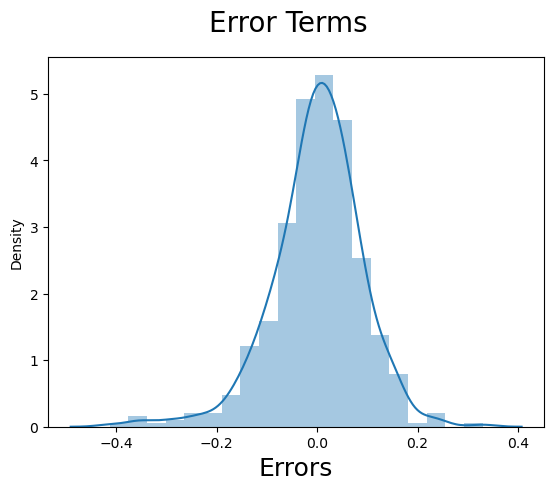

In [95]:
# Normality of error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

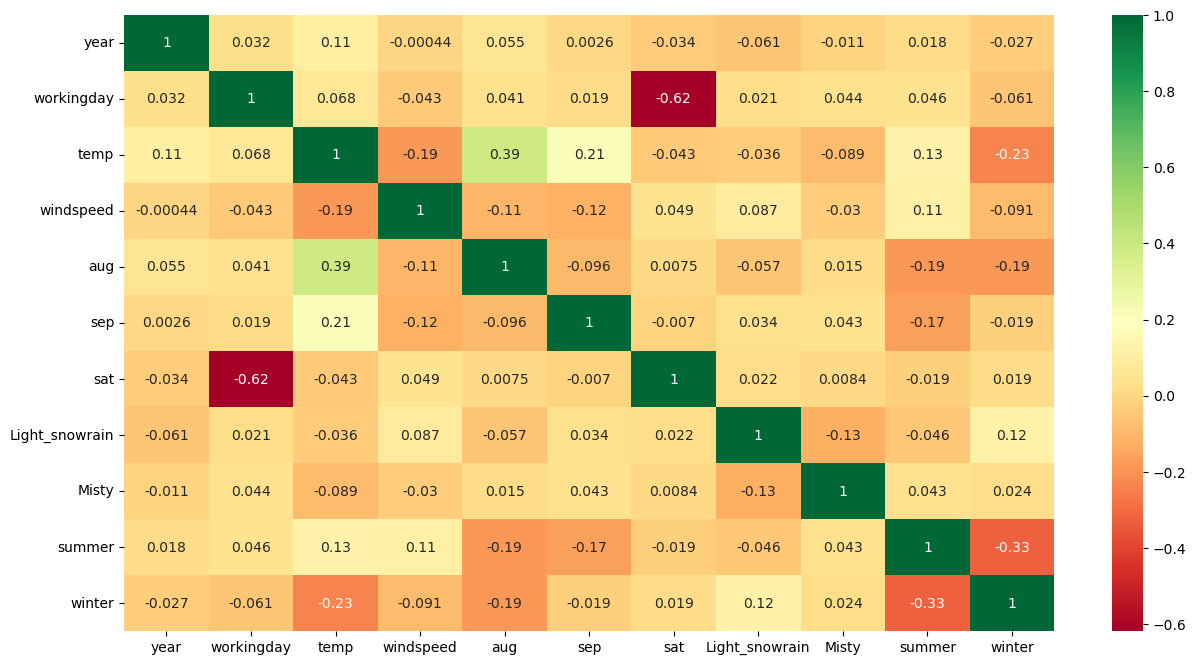

In [110]:
#Multicolinarilty
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn")
plt.show()

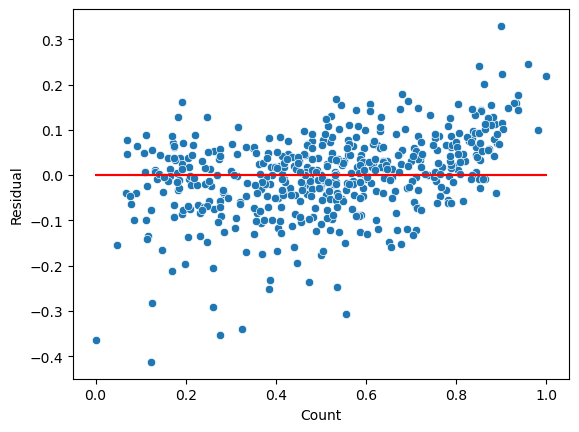

In [109]:
#Homoscedasticity
y_train_pred = lr_5.predict(X_train_lm_5)
residual = y_train - y_train_pred
sns.scatterplot(x=y_train,y=residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

In [96]:
# Applying scaling on the test dataset

num_vars = ['temp', 'atemp', 'humidity', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,0,0,1,0,0,0,0,0,1,0


In [97]:
df_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.059091,0.086364,...,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.236333,0.281541,...,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [98]:
y_test = df_test.pop('cnt')
X_test = df_test

In [99]:
col1 = X_train_new.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm_5 = sm.add_constant(X_test)

In [100]:
y_pred = lr_5.predict(X_test_lm_5)

In [101]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.7973

Text(0, 0.5, 'y_pred')

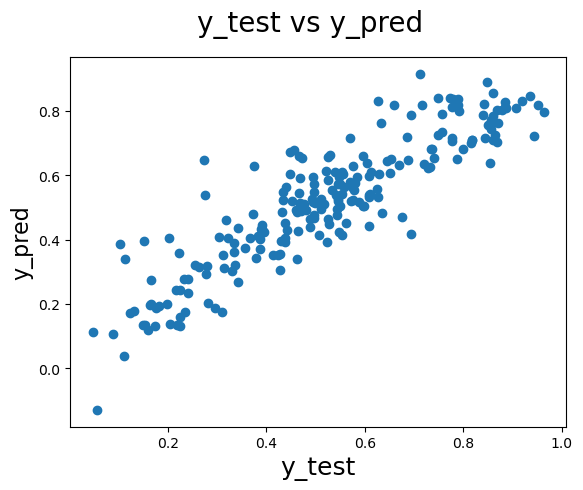

In [102]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [103]:
round(lr_5.params,4)

const             0.0809
year              0.2328
workingday        0.0546
temp              0.5208
windspeed        -0.1518
aug               0.0512
sep               0.1117
sat               0.0653
Light_snowrain   -0.2860
Misty            -0.0826
summer            0.1010
winter            0.1379
dtype: float64

In [104]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7866


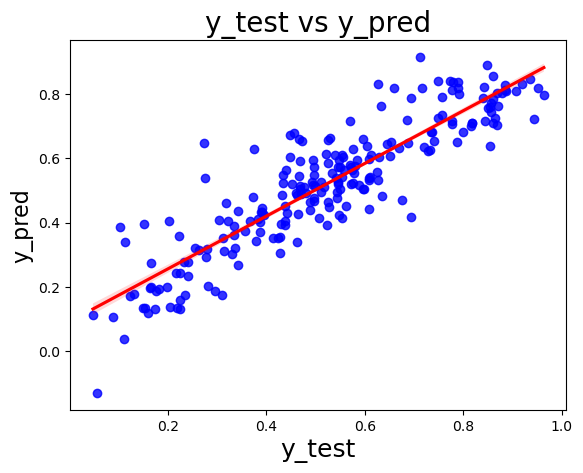

In [105]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

Train dataset R2 = 0.838
Train dataset Adjusted R2 = 0.835
Test dataset R2 = 0.7973
Test dataset Adjusted R2 = 0.7866